In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive




## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df_unique = application_df.nunique()
application_df_unique

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

## Choose a cutoff value
cutoff_value = 500

application_types_to_replace = app_counts[app_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1

class_above_one = classification_counts[classification_counts > 1]
class_above_one

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

## Choose a cutoff value
cutoff_value = 1200

classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
## Note: .astype(int) was added to switch boolean variables (True/False) to integers

application_df_dummies = pd.get_dummies(application_df).astype(int)
application_df_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies["IS_SUCCESSFUL"].values
X = application_df_dummies.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train.shape

(25724, 43)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model

> **Attempt #1: Add more neurons**

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=120, activation="relu", input_dim=len(X_train[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 12601 (49.22 KB)
Trainable params: 12601 (49.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5705 - accuracy: 0.7232
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5513 - accuracy: 0.7315
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.7328
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7334
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accura

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5574 - accuracy: 0.7262 - 710ms/epoch - 3ms/step
Loss: 0.5573685765266418, Accuracy: 0.7261807322502136


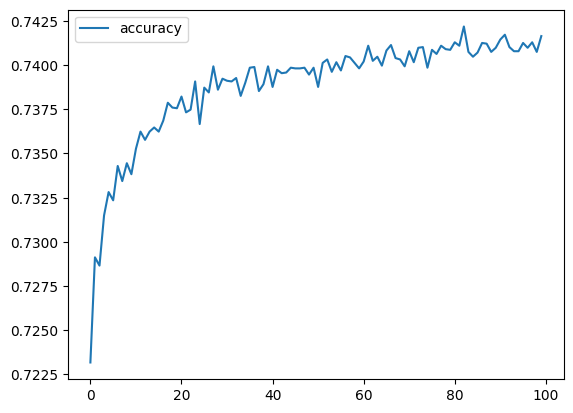

In [17]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

`RESULTS 1: `

*   Accuracy: 72.6%
*   Adding more neurons did not increase accuracy, let's try different activation functions next.



## Optimize the Model
> **Attempt #2: Add another hidden layer, use different activation functions, reduce epochs number**


In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=120, activation="relu", input_dim=len(X_train[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               5280      
                                                                 
 dense_4 (Dense)             (None, 60)                7260      
                                                                 
 dense_5 (Dense)             (None, 20)                1220      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 13781 (53.83 KB)
Trainable params: 13781 (53.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5645 - accuracy: 0.7244
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7286
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7304
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7333
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7322
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7339
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5480 - accuracy: 0.7356
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5470 - accuracy: 0.7333
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7347
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7358

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5534 - accuracy: 0.7248 - 748ms/epoch - 3ms/step
Loss: 0.5534376502037048, Accuracy: 0.724781334400177


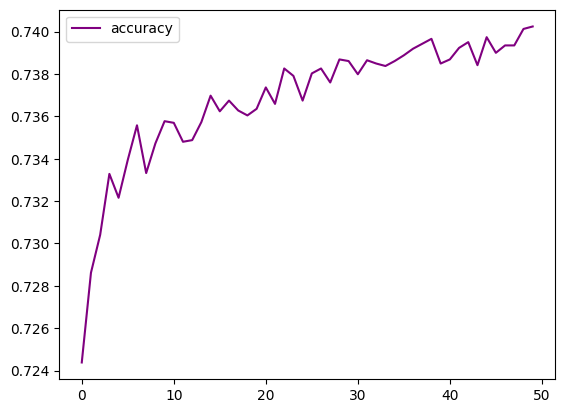

In [22]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy", color='purple')
plt.show()

`RESULTS 2:`

*   Accuracy: 72.4%
*   Adding more hidden layer, and using different activation function still did not increase any accuracy.
*   Let's try something different next.




## Optimize the Model
> **Attempt #3: Add Dropout to minimize co-adaptation of nodes and reduce overfitting; and use activation function: LeakyReLU**

In [23]:
# import Dropout
from tensorflow.keras.layers import Dense,Dropout

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="LeakyReLU", input_dim=len(X_train[0])))
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="LeakyReLU"))
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 60)                2640      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1220      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3881 (15.16 KB)
Trainable params: 3881 (15.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6019 - accuracy: 0.7045
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5766 - accuracy: 0.7210
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7246
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5675 - accuracy: 0.7265
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5651 - accuracy: 0.7263
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.7278
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5634 - accuracy: 0.7285
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5613 - accuracy: 0.7281
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5609 - accuracy: 0.7267
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5606 - accuracy: 0.7290

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5528 - accuracy: 0.7255 - 697ms/epoch - 3ms/step
Loss: 0.5527852773666382, Accuracy: 0.7254810333251953


<Axes: >

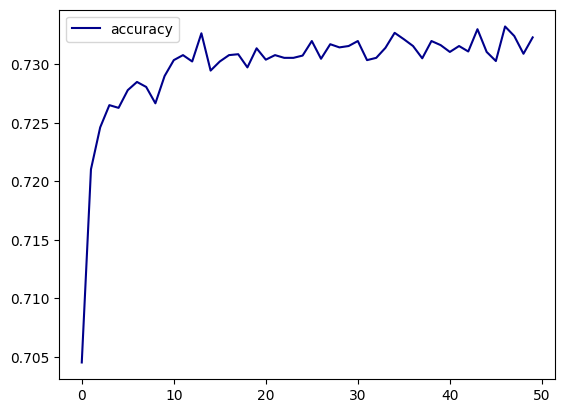

In [28]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy", color='darkblue')

`RESULTS 3: `

*   Accuracy: 72.5%
*   No improvement in acccuracy at all. None of these methods are working, so might need to revisit the preprocessed dataset and look at columns and bins we created before.


In [29]:
# Export our model to HDF5 file
nn.save("/content/gdrive/My Drive/AlphabetSoupCharity_Optimization_1_2_3.h5")
print("HDF5 file successfully.")

HDF5 file successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
